In [183]:
import pandas as pd
import numpy as np
import scipy
import json
#from matplotlib import cm
from pandas.io.json import json_normalize #package for flattening json in pandas df

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sets standard seaborn theme as default


In [5]:
data = pd.read_csv('/Users/iMotz/Propulsion/PYTHON/Visualization/data/mpg.csv')
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [7]:
# convert categorical into integer
data['class'] = pd.Categorical(data['class'])
data['Class_GI'] = data['class'].cat.codes
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Class_GI
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,1
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,1
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1


In [8]:
# calculate mean displacement per car class

# scheme: [ x for x in sth]
data['Mean_displ'] = [np.mean(data['displ'][data['class'] == i]) for i in data['class']]
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Class_GI,Mean_displ
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1,2.325532
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,1,2.325532
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,1,2.325532
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1,2.325532
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1,2.325532


## Scatter plots

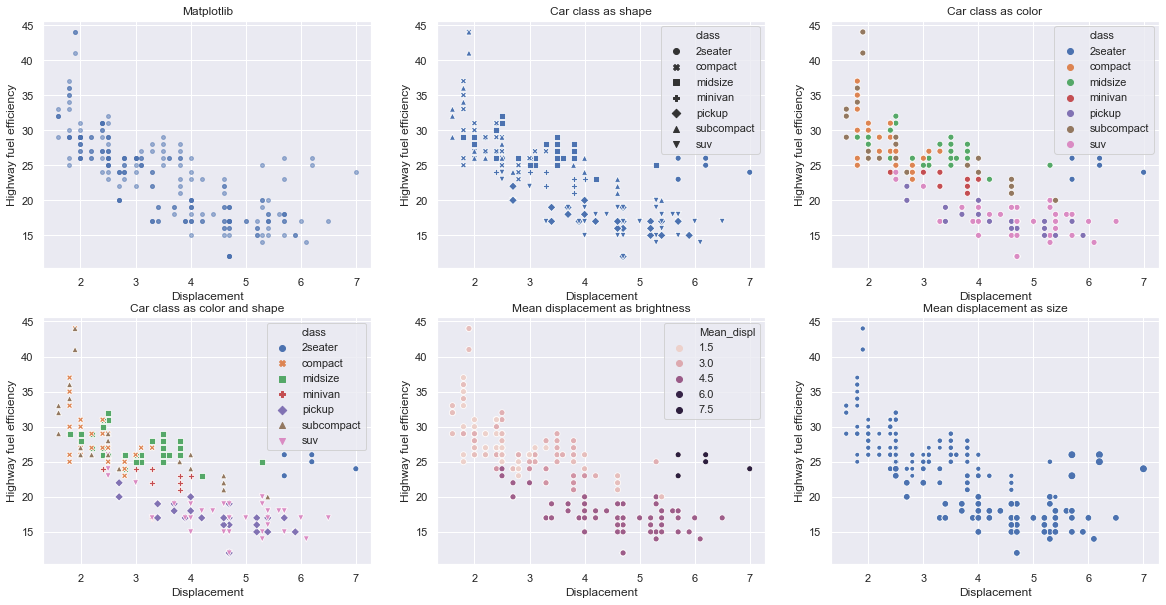

In [9]:
# create class index

plt.rcParams['figure.figsize'] = (20,10)
fig, [[ax1, ax2, ax3],[ax4, ax5, ax6]] = plt.subplots(2,3)

ax1.scatter(data['displ'], data['hwy'], s=15, alpha = 0.5)
ax1.set_xlabel('Displacement')
ax1.set_ylabel('Highway fuel efficiency')
ax1.set_title('Matplotlib')

sns.scatterplot('displ', 'hwy', data = data, style = 'class', ax = ax2)
ax2.set_title('Car class as shape')
ax2.set_xlabel('Displacement')
ax2.set_ylabel('Highway fuel efficiency')

sns.scatterplot('displ', 'hwy', data = data,  hue = 'class', ax = ax3)
ax3.set_title('Car class as color')
ax3.set_xlabel('Displacement')
ax3.set_ylabel('Highway fuel efficiency')

sns.scatterplot('displ', 'hwy', data = data, style = 'class', hue = 'class', ax = ax4)
ax4.set_title('Car class as color and shape')
ax4.set_xlabel('Displacement')
ax4.set_ylabel('Highway fuel efficiency')

sns.scatterplot('displ', 'hwy', data = data, hue = data['Mean_displ'], ax = ax5)
ax5.set_title('Mean displacement as brightness')
ax5.set_xlabel('Displacement')
ax5.set_ylabel('Highway fuel efficiency')

sns.scatterplot('displ', 'hwy', data = data, s = data['Mean_displ']*10, ax = ax6)
ax6.set_title('Mean displacement as size')
ax6.set_xlabel('Displacement')
ax6.set_ylabel('Highway fuel efficiency')

#alpha=0.8, c=color, edgecolors='none', s=30, label=group
None

### Plot for presentation

In [52]:
# get min and max 
min_hwy = data[data['hwy'] == min(data['hwy']) ]
max_hwy = data[data['hwy'] == max(data['hwy']) ]
max_hwy


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Class_GI,Mean_displ
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,1,2.325532
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,5,2.660000


In [53]:
min_hwy_labels = []
for i in range(0, len(min_hwy)):
    min_hwy_labels.append(min_hwy.manufacturer.iloc[i]+' '+min_hwy.model.iloc[i]+', '+str(min_hwy.year.iloc[i]))

max_hwy_labels = []
for i in range(0, len(max_hwy)):
    max_hwy_labels.append(max_hwy.manufacturer.iloc[i]+' '+max_hwy.model.iloc[i]+', '+str(max_hwy.year.iloc[i]))
                    

In [172]:
min_label = '\n'.join(min_hwy_labels)
max_label = '\n'.join(max_hwy_labels)


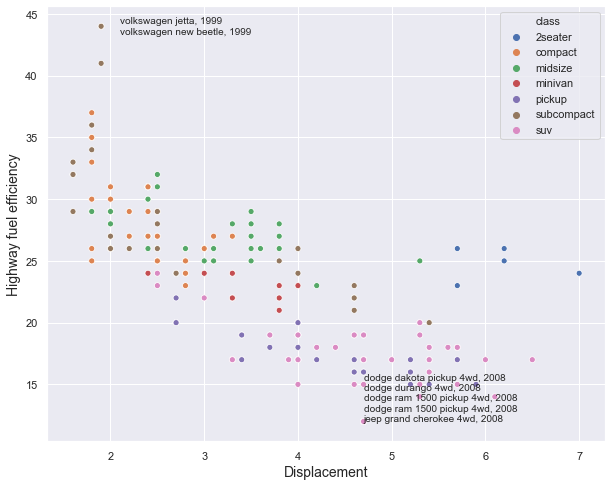

In [181]:
plt.rcParams['figure.figsize'] = (10,8)
fig, ax = plt.subplots()

sns.scatterplot('displ', 'hwy', data = data,  hue = 'class', ax = ax)
ax.set_xlabel('Displacement', size = 14)
ax.set_ylabel('Highway fuel efficiency', size = 14)
ax.annotate( min_label, (min_hwy.displ.iloc[0], min_hwy.hwy.iloc[0]))
ax.annotate( max_label, (max_hwy.displ.iloc[0]+0.2, max_hwy.hwy.iloc[0]), verticalalignment='center')    
None

plt.savefig('/Users/iMotz/Propulsion/PYTHON/Visualization/Car_scatter.svg')

## Extras

In [71]:
sub_data = data[data['class'] == 'subcompact'].reset_index()

sub_data.head()

,index,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Class_GI,Mean_displ
0,90,ford,mustang,3.8,1999,6,manual(m5),r,18,26,r,subcompact,5,2.66
1,91,ford,mustang,3.8,1999,6,auto(l4),r,18,25,r,subcompact,5,2.66
2,92,ford,mustang,4.0,2008,6,manual(m5),r,17,26,r,subcompact,5,2.66
3,93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact,5,2.66
4,94,ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact,5,2.66


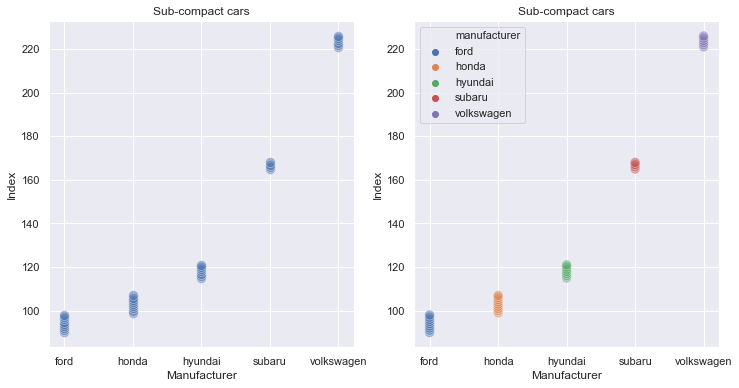

In [72]:
plt.rcParams['figure.figsize'] = (12,6)
fig, [ax1, ax2] = plt.subplots(1,2)

sns.scatterplot(x = sub_data['manufacturer'], y = sub_data['index'], ax = ax1, s = 100, alpha = 0.5)
ax1.set_title('Sub-compact cars')
ax1.set_xlabel('Manufacturer')
ax1.set_ylabel('Index')

sns.scatterplot(x = sub_data['manufacturer'], y = sub_data['index'], ax = ax2, hue = sub_data['manufacturer'], s = 100, alpha = 0.5)
ax2.set_title('Sub-compact cars')
ax2.set_xlabel('Manufacturer')
ax2.set_ylabel('Index')

None

## Faceting

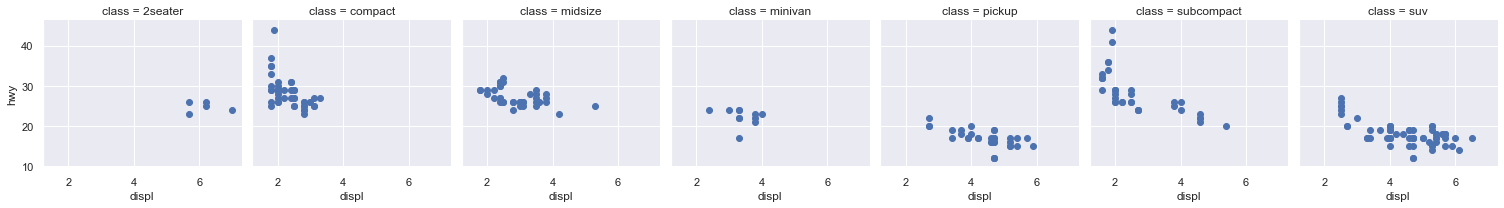

In [89]:
# Generate a facetted scatter plot
fig = sns.FacetGrid(data, col = 'class') # col_wrap = 3 breaks line
fig.map(plt.scatter, 'displ', 'hwy')
None

### For presentation

In [165]:
# new df that only contains min/max values PER CLASS; loop over classes, append to df
uniq_class = data['class'].unique()
min_max_df = pd.DataFrame(columns = data.columns, data = [])

for item in uniq_class:
    curr_data = data[data['class'] == item]
    min_data = curr_data[curr_data['hwy'] == min(curr_data['hwy'])]
    min_data = min_data.append(curr_data[curr_data['hwy'] == max(curr_data['hwy'])])
    min_max_df = min_max_df.append(min_data)

min_max_df   

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Class_GI,Mean_displ
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,1,2.325532
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,1,2.325532
17,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize,2,2.921951
144,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize,2,2.921951
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,6,4.456452
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,6,4.456452
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv,6,4.456452
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,0,6.160000
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,0,6.160000
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,0,6.160000


In [166]:
# extra vars for facet plot
my_order = ['subcompact','compact','midsize','minivan','suv','pickup','2seater']
kws = dict(s=100, edgecolor = None, color= 'grey', alpha = 0.5)
second = dict(s=100, edgecolor = None, color= 'green', alpha = 0.5)

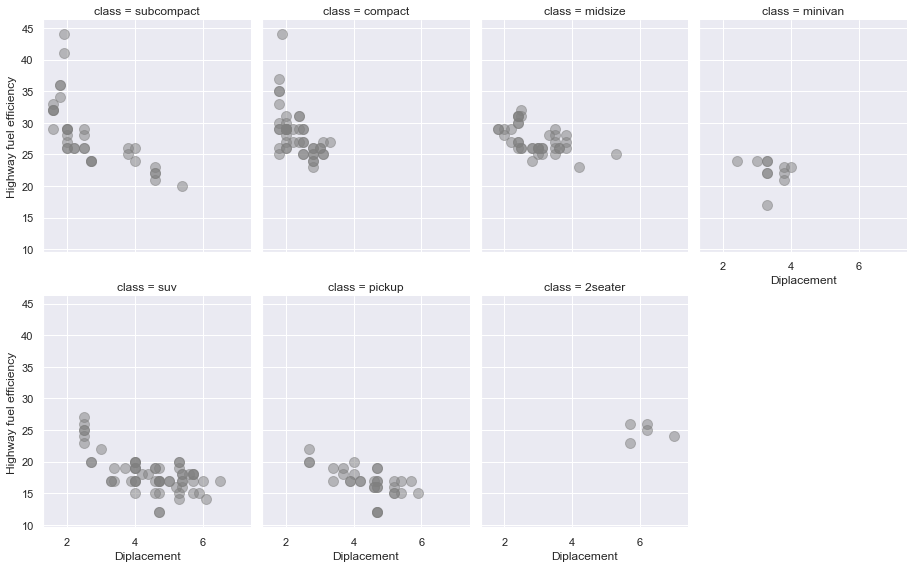

In [182]:
# Modified facetted scatter plot
fig = sns.FacetGrid(data, col = 'class', height=4, aspect=0.8, col_order = my_order, col_wrap = 4) # col_wrap = 3 breaks line
fig.map(plt.scatter, 'displ', 'hwy',**kws).set_axis_labels('Diplacement','Highway fuel efficiency')
# for i in range(0,len(my_order)):
#     fig.axes[0,i].scatter('displ', 'hwy', data = min_max_df[min_max_df['class'] == my_order[i]] ,color = 'green' )


#fig.axes[0,1].set_xlabel('axes label 2') # to modify individual plot
None
plt.savefig('/Users/iMotz/Propulsion/PYTHON/Visualization/Car_facet_1.svg')

## Transforming

In [ ]:
with open('/Users/iMotz/Propulsion/PYTHON/Visualization/data/burtin.json') as f: 
    data2 = json.load(f)
print(data2)


In [ ]:
# convert to df
data2_bact = json_normalize(data2)
data2_bact.head()

In [3]:
data2_bact_stack = pd.DataFrame(columns = ['Conc'], data = data2_bact[['neomycin','penicillin','streptomycin']].stack())
data2_bact_stack = data2_bact_stack.reset_index()
data2_bact_stack.columns = ['Bacteria_ix', 'Antibiotic','Dosage']
data2_bact_stack.head()


NameError: name 'pd' is not defined

In [ ]:
bact_labels = list(data2_bact['bacteria'])


## Bar plots

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
fig, [ax1, ax2] = plt.subplots(1,2)
sns.barplot(x = 'Bacteria_ix', y = 'Dosage', data = data2_bact_stack, hue = 'Antibiotic', ax = ax1)
sns.barplot(x = 'Bacteria_ix', y = 'Dosage', data = data2_bact_stack, hue = 'Antibiotic', ax = ax2)
ax2.set_yscale('log')
ax2.set_xticklabels(bact_labels, rotation = 90)
ax2.set_xlabel(' ')
None

## Heatmap

In [ ]:
data3 = data2_bact.drop(columns = ['gram','bacteria'])

In [ ]:
sns.heatmap(data3, cmap = 'coolwarm', robust = False, square = True,
            yticklabels = bact_labels)
None

## Clustermap

In [ ]:
sns.clustermap(data3, cmap = 'coolwarm', yticklabels = bact_labels, 
               row_cluster = True, col_cluster = True)
None